In [1]:
from qiskit import * 

In [2]:
nqubits = 3
circuit = QuantumCircuit(nqubits, nqubits)
circuit.h(0)
circuit.cx(0,1)
circuit.cx(1,2)
circuit.measure([0,1,2], [0,1,2])

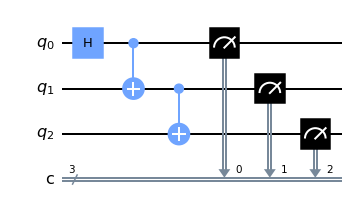

In [5]:
%matplotlib inline
circuit.draw(output = "mpl")

In [6]:
simulator = Aer.get_backend('qasm_simulator')
sim_result = execute(circuit, backend = simulator, shots = 1024).result()

In [7]:
from qiskit.visualization import plot_histogram

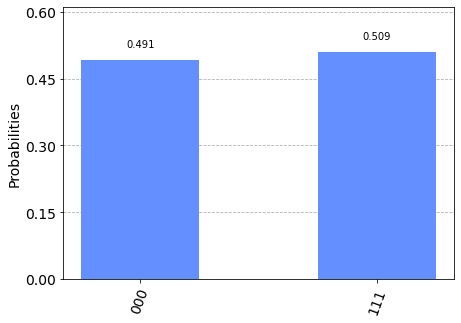

In [8]:
plot_histogram(sim_result.get_counts(circuit))

In [13]:
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q', group='open', project='main')
provider.backends()

ibmqfactory.load_account:WARNING:2022-03-03 06:51:24,686: Credentials are already in use. The existing account in the session will be replaced.


[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_bogota') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_m

In [15]:
device = provider.get_backend('ibmq_quito')
job = execute(circuit, backend = device, shots = 1024)
print(job.job_id())

6220d62c38eb658496a26006


In [16]:
from qiskit.tools.monitor import job_monitor
job_monitor

<function qiskit.tools.monitor.job_monitor.job_monitor(job, interval=None, quiet=False, output=<ipykernel.iostream.OutStream object at 0x7fe11c7bfee0>, line_discipline='\r')>

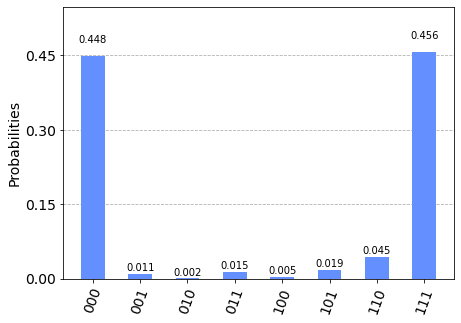

In [17]:
device_result = job.result()
plot_histogram(device_result.get_counts(circuit))

In [18]:
from qiskit.ignis.mitigation.measurement import (complete_meas_cal, CompleteMeasFitter)

/var/folders/s7/bmvftc857118gk500n7r3bxm0000gn/T/ipykernel_796/1503385324.py:1: DeprecationWarning: The qiskit.ignis package is deprecated and has been supersceded by the qiskit-experiments project. Refer to the migration guide: https://github.com/Qiskit/qiskit-ignis#migration-guide on how to migrate to the new project.
  from qiskit.ignis.mitigation.measurement import (complete_meas_cal, CompleteMeasFitter)


In [21]:
cal_circuits, state_labels, = complete_meas_cal(qr = circuit.qregs[0], circlabel= 'measerrormitigationcal')

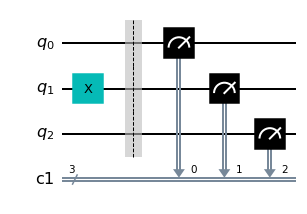

In [22]:
cal_circuits[2].draw(output = "mpl")

In [23]:
len(cal_circuits)

8

In [27]:
cal_job = execute(cal_circuits, backend = device, shots = 1024, optimization_level = 0)
print(cal_job.job_id())
job_monitor(cal_job)
cal_results = cal_job.result()

6220da9ee5138222d085c79a
Job Status: job has successfully run


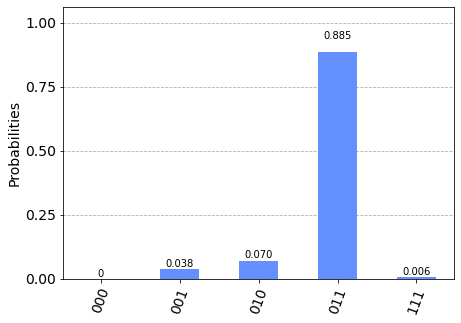

In [28]:
plot_histogram(cal_results.get_counts(cal_circuits[3]))

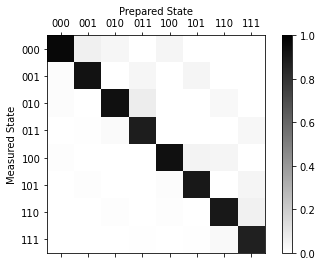

In [29]:
meas_fitter = CompleteMeasFitter(cal_results, state_labels)
meas_fitter.plot_calibration()

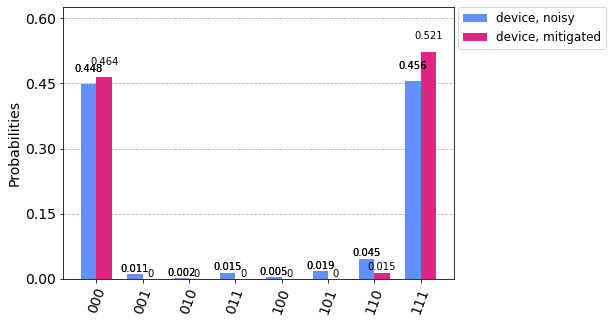

In [30]:
meas_filter = meas_fitter.filter
mitigated_result = meas_filter.apply(device_result)
device_counts = device_result.get_counts(circuit)
mitigated_counts = mitigated_result.get_counts(circuit)
plot_histogram([device_counts, mitigated_counts], legend=['device, noisy', 'device, mitigated'])

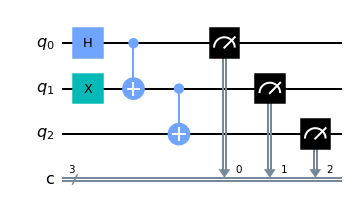

In [32]:
circuit2 = QuantumCircuit(3,3)
circuit2.x(1)
circuit2.h(0)
circuit2.cx(0,1)
circuit2.cx(1,2)
circuit2.measure([0,1,2], [0,1,2])
circuit2.draw(output="mpl")

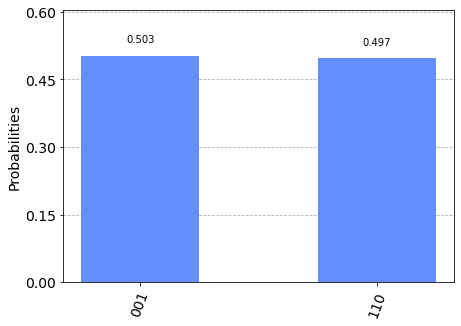

In [34]:
plot_histogram(execute(circuit2, backend = simulator, shots = 1024).result().get_counts(circuit2))

In [ ]:
device_counts_2 = execute(circuit2, backend = device, shots = 1024).result().get_counts(circuit2)
plot_histogram(device_counts_2)

In [ ]:
device_mitigated_counts_2 = meas_filter.apply(device_counts_2)
plot_histogram(device_mitigated_counts_2)